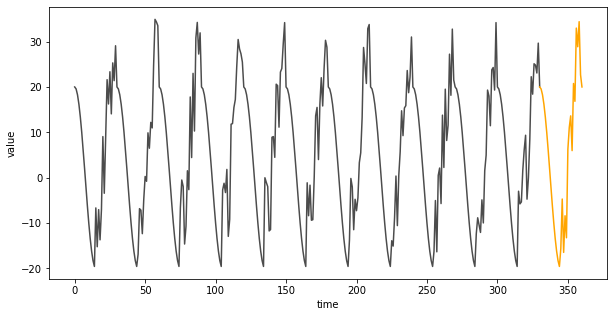

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

time = np.arange(30*12+1)
month_time = (time%30)/30
time_series = 20 * np.where(month_time < 0.5 ,
                           np.cos(2 * np.pi * month_time),
                           np.cos(2 * np.pi * month_time)+ np.random.random(361))
plt.figure(figsize=(10,5))
plt.xlabel("time")
plt.ylabel("value")


#학습용 데이터 

plt.plot(np.arange(0,30*11+1),
        time_series[:30 * 11 + 1],
        color = 'black',
        alpha = 0.7)

#테스트 데이터
plt.plot(np.arange(30*11, 30*12+1),
        time_series[30*11:],
        color = "orange")

In [6]:
# Data Preprocessing 
def make_sequence(time_series, n):
    x_train, y_train = list(), list()
    
    for i in range(len(time_series)):
        x = time_series[i:i+n]
        if i+n < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i+n])
        else:
            break
    return np.array(x_train), np.array(y_train)

n=10
x_train, y_train = make_sequence(time_series,n)
x_train = x_train.reshape(-1,n,1)
y_train = y_train.reshape(-1,1)

from sklearn.model_selection import train_test_split

patial_x_train = x_train[:30*11]
patial_y_train = y_train[:30*11]

x_test = x_train[30*11:]
y_test = y_train[30*11:]

print("train",patial_x_train.shape,patial_y_train.shape)
print("test",x_test.shape,y_test.shape)
print(patial_x_train[0],patial_y_train[0])

train (330, 10, 1) (330, 1)
test (21, 10, 1) (21, 1)
[[20.        ]
 [19.56295201]
 [18.27090915]
 [16.18033989]
 [13.38261213]
 [10.        ]
 [ 6.18033989]
 [ 2.09056927]
 [-2.09056927]
 [-6.18033989]] [-10.]


In [8]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(SimpleRNN(units=32,activation="tanh",input_shape=(n,1)))
model.add(Dense(1,activation="linear"))

model.compile(optimizer="adam",loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1088      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(x_train,y_train,epochs=100,batch_size=12)

Epoch 1/100
30/30 [==============================] - 0s 1ms/step - loss: 257.5847
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 223.6390
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 193.3484
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 166.4870
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 148.3538
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 134.2127
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 122.9320
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 111.5848
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 103.6893
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 97.0364
Epoch 11/100
30/30 [==============================] - 0s 1ms/step - loss: 91.3015
Epoch 12/100
30/30 [==============================] - 0s 1ms/step - loss: 86.2012
Epoch 13/100
30/

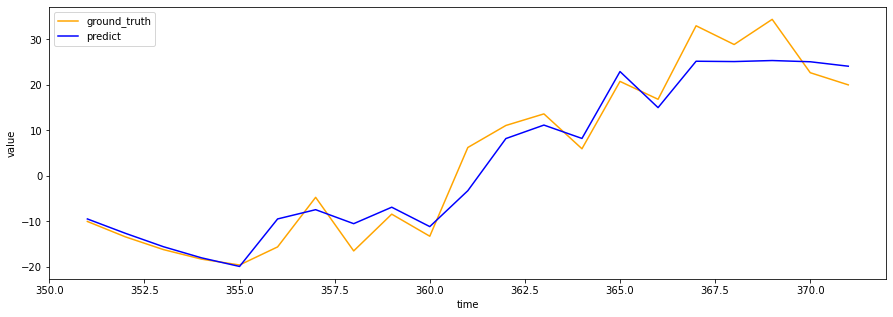

In [12]:
pred = model.predict(x_test)

pred_range=np.arange(len(y_train),len(y_train)+len(pred))

plt.figure(figsize=(15,5))
plt.xlabel('time')
plt.ylabel('value')
plt.plot(pred_range,y_test.reshape(-1,),color="orange",label="ground_truth")
plt.plot(pred_range,pred.reshape(-1,),color = "blue",label="predict")
plt.legend()
plt.show()